In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [26]:
df= pd.read_csv('Student_Performance.csv')

In [20]:
df.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [8]:
df.nunique()

Hours Studied                        9
Previous Scores                     60
Extracurricular Activities           2
Sleep Hours                          6
Sample Question Papers Practiced    10
Performance Index                   91
dtype: int64

In [27]:
df2= pd.get_dummies(df["Extracurricular Activities"], drop_first=True)
df2.head(5)

,Yes
0,1
1,0
2,1
3,1
4,0


In [28]:
df= pd.concat([df, df2], axis=1)
df.head(5)
#df.drop(["Extracurricular Activities"], axis=1)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Yes
0,7,99,Yes,9,1,91.0,1
1,4,82,No,4,2,65.0,0
2,8,51,Yes,7,2,45.0,1
3,5,52,Yes,5,2,36.0,1
4,7,75,No,8,5,66.0,0


In [31]:
df.drop(["Extracurricular Activities"], axis=1, inplace=True)
df= df.rename(columns={"Yes":"extracurricular activities"})
df.head(5)

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,extracurricular activities
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0


<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

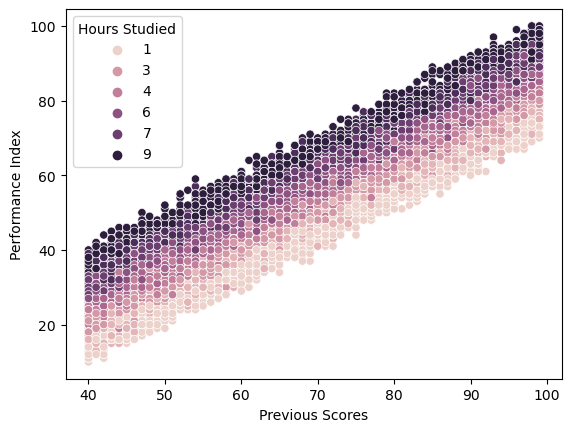

In [34]:
sns.scatterplot(x="Previous Scores", y="Performance Index",hue="Hours Studied", data=df)

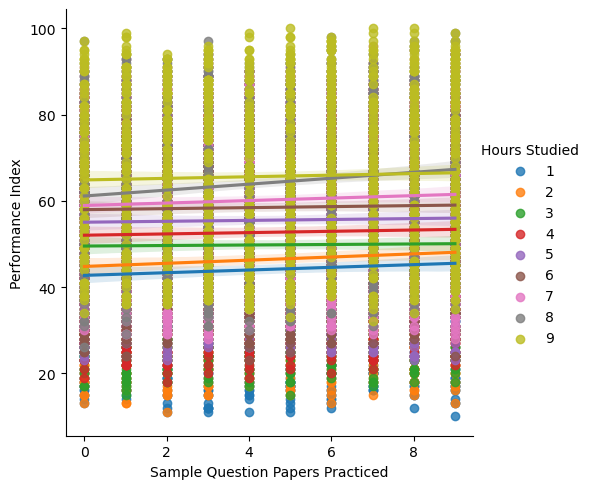

In [37]:
sns.lmplot(x="Sample Question Papers Practiced", y="Performance Index", hue="Hours Studied",data=df)

<Axes: >

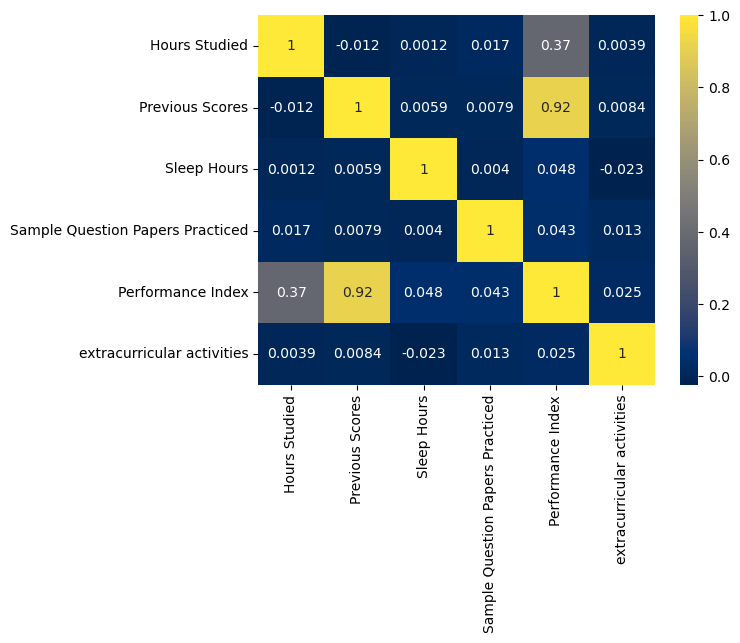

In [40]:
sns.heatmap(df.corr(), cmap="cividis",annot=True)

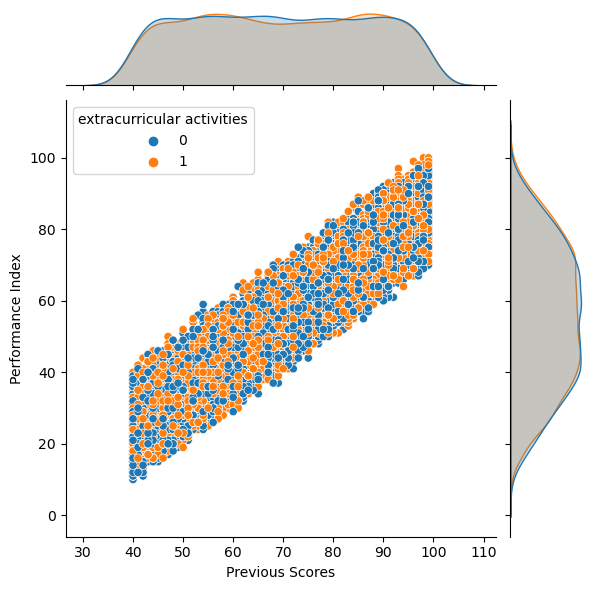

In [45]:
sns.jointplot(x="Previous Scores", y="Performance Index", hue="extracurricular activities", data=df)

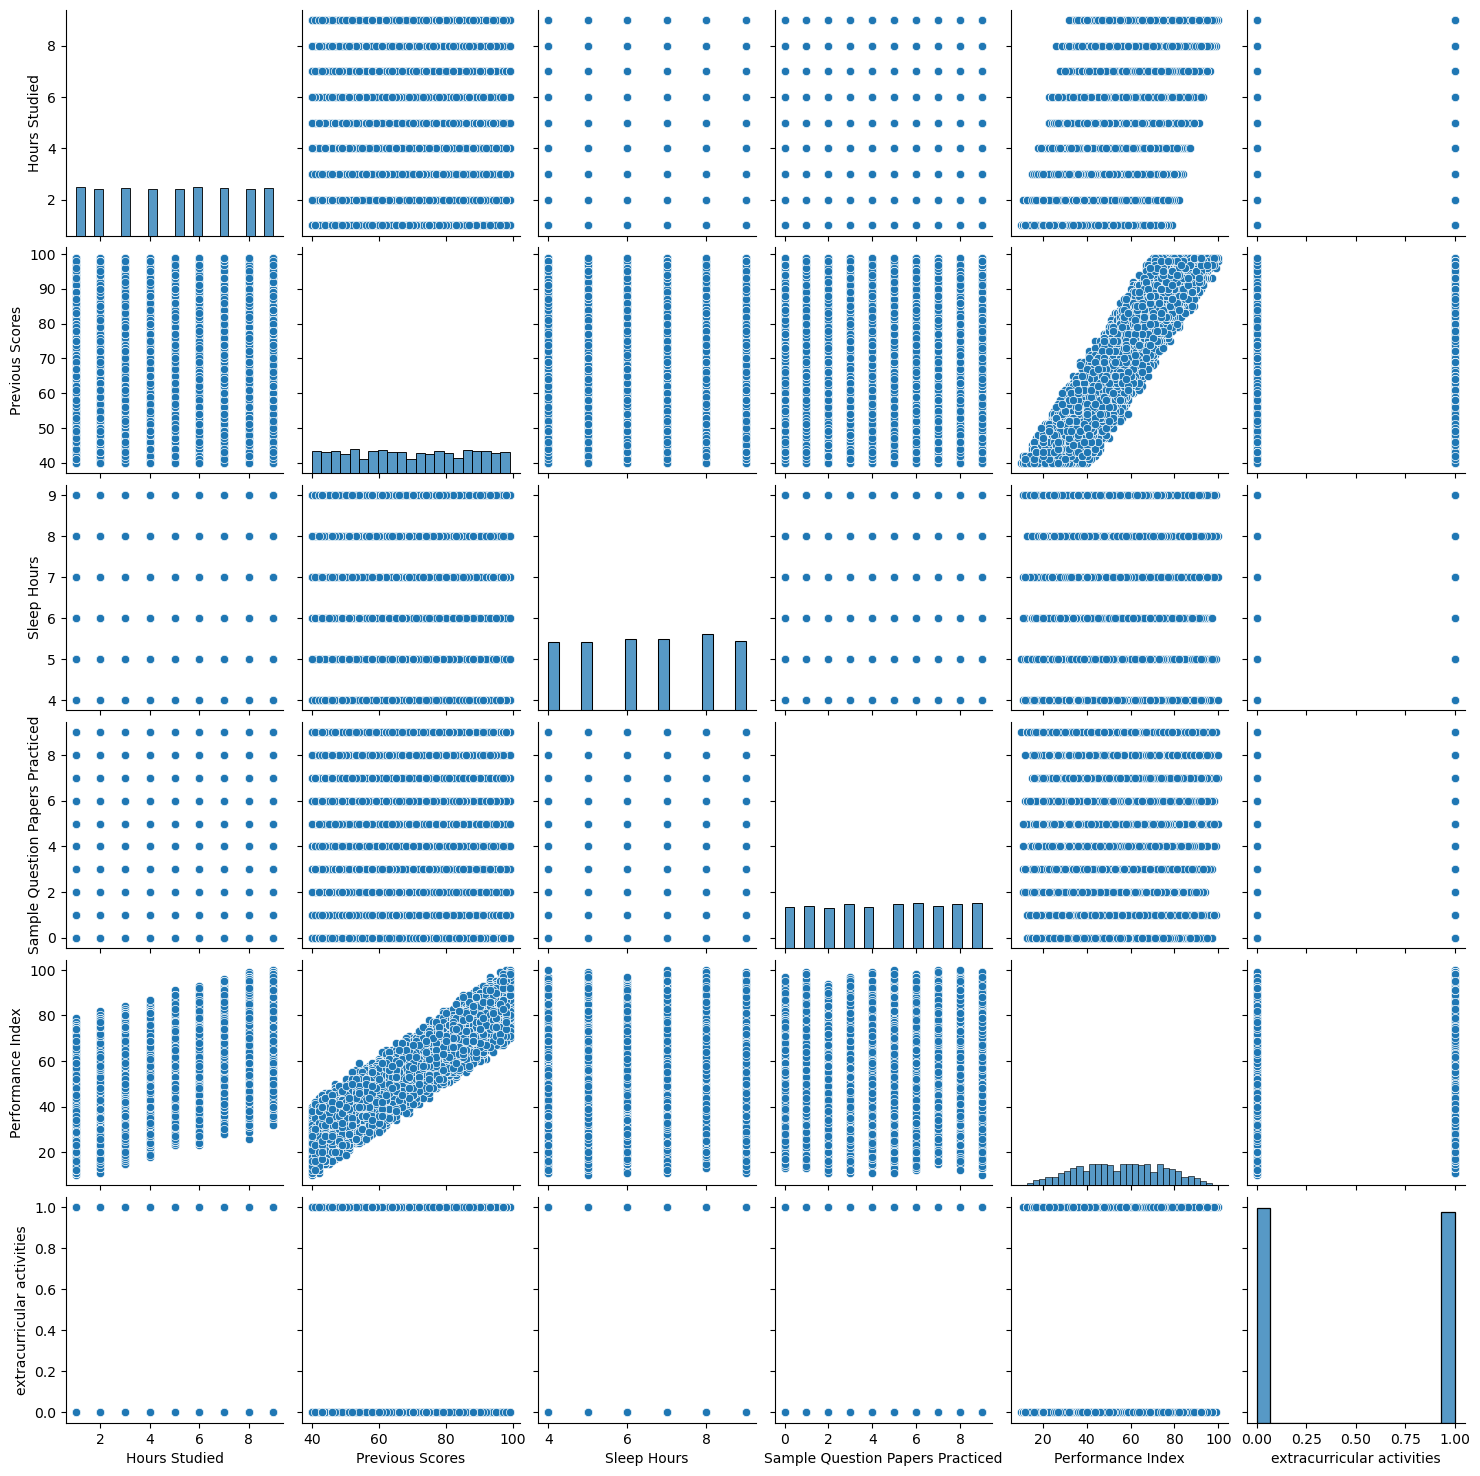

In [51]:
sns.pairplot(data=df)

LINEAR REGRESSION

In [53]:
X= df.drop(["Performance Index"], axis=1)
y= df["Performance Index"]

In [54]:
#perform train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=42)

In [55]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_train_sc= scaler.fit_transform(X_train)
X_test_sc= scaler.fit_transform(X_test)

In [56]:
from sklearn.linear_model import LinearRegression

In [58]:
classifier= LinearRegression()
classifier.fit(X_train_sc, y_train)
y_pred= classifier.predict(X_test_sc)

In [59]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

1.6512846285053133

In [60]:
print(y_test)

6252    51.0
4684    20.0
1731    46.0
4742    28.0
4521    41.0
        ... 
6412    45.0
8285    66.0
7853    16.0
1095    65.0
6929    47.0
Name: Performance Index, Length: 2000, dtype: float64


In [61]:
print(y_pred)

[55.07482706 22.8504016  48.314699   ... 17.04858015 63.63952421
 46.29885906]


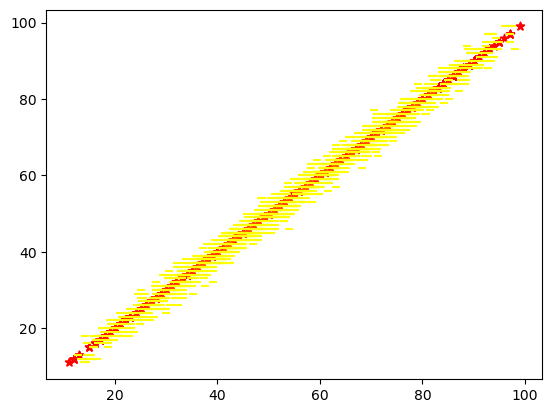

In [62]:
plt.scatter(y_test, y_test, color='red', marker='*')
plt.scatter(y_pred, y_test, color='yellow', marker='_')

In [75]:
from sklearn.metrics import r2_score

# Assuming y_true and y_pred are your actual and predicted values
r2 = r2_score(y_test, y_pred)
r2

0.9884832861331776